# Configuração do Ambiente

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura do Arquivo

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Declaração das funções

In [149]:
def top_n_countries(df:pd.DataFrame, hotel:str='', n:int=15) -> None:
  '''
  Gera um gráfico de colunas com o total de reservas de cada país.

  O parâmetro 'n' define o total de países que serão exibidos
  (serão os n mais frequentes).

  O parâmetro 'hotel' define sobre qual hotel será gerada a análise.
  Caso não seja passado nada, será feita a análise em todos os hotéis juntos.
  '''
  if hotel:
    df = df[df['hotel']==hotel]
  # Remove os valores nulos
  df = df.dropna(subset=['country'])

  # Listagem de todos os países
  countries = list( df['country'].unique() )
  # Contagem da ocorrência de cada país
  contagem = list()
  for country in countries:
    total = len( df[df['country']==country] )
    contagem.append(total)
  # Ordenação das listas pela contagem
  for i in range(len(countries)):
    for j in range(i, len(countries)):
      if contagem[i] < contagem[j]:

        temp = contagem[i]
        contagem[i] = contagem[j]
        contagem[j] = temp

        temp = countries[i]
        countries[i] = countries[j]
        countries[j] = temp

  # Filtra os top N países mais frequentes
  countries = countries[:n]
  contagem = contagem[:n]

  # Define cores para os 3 primeiros e uma cor padrão para os demais
  colors =  ['green', 'limegreen', 'orange'] + ['red'] * (len(countries) - 3)

  fig, ax = plt.subplots()

  ax.bar(countries, contagem, color=colors)

  ax.set_title(f'{hotel} Top {n} países com maiores quantidades de reserva')
  ax.set_xlabel('País')
  ax.set_ylabel('Total de reservas')


In [169]:
def primeiros_x_retornos(df:pd.DataFrame, hotel:str='') -> None:
  '''
  Cria um gráfico de colunas com uma coluna para o total de reservas de
  pessoas que estão reservando pela primeira vez, e uma coluna para o total
  de reservas de pessoas que já reservaram neste hotel antes.

  O parâmetro 'hotel' define sobre qual hotel será gerada a análise.
  Caso não seja passado nada, será feita a análise em todos os hotéis juntos.
  '''
  # Filtra o DataFrame pelo hotel
  if hotel:
    df = df[df['hotel']==hotel]
  # Define o nome das colunas
  labels = ['Primeira Visita', 'Retorno']
  contagem = [0, 0]

  # Os valores de 'is_repeated_guest' são apenas
  # 0 (Primeira Visita) ou 1 (Retorno),
  # então os valores da lista podem ser usadas
  # como índices para incrementar a lista de contagem
  for i in df['is_repeated_guest'].to_list():
    contagem[i] += 1


  fig, ax = plt.subplots()

  ax.bar(labels, contagem, color=['red', 'green'])

  ax.set_title(f'{hotel} Primeiras Visitas  X  Retornos ')
  ax.set_ylabel('Total de reservas')


In [148]:
def vagas_reservadas(df:pd.DataFrame, hotel:str='', n:int=2) -> None:
  '''
  Gera um gráfico de colunas horizontais com o total de
  reservas com cada quantidade de vagas reservadas.

  O parâmetro 'n' define o total de quantidades de
  vagas que serão exibidos (serão as n mais frequentes).

  O parâmetro 'hotel' define sobre qual hotel será gerada a análise.
  Caso não seja passado nada, será feita a análise em todos os hotéis juntos.
  '''
  # Filtra o DataFrame pelo hotel
  if hotel:
    df = df[df['hotel']==hotel]

  # Listagem de todos os valores de quantidade de vaga reservada
  labels = list( df['required_car_parking_spaces'].unique() )
  # Cria uma lista com a contagem de cada valor
  contagem = list()
  valores = df['required_car_parking_spaces'].to_list()
  for label in labels:
    contagem.append( valores.count(label) )

  # Filtra as top N quantidade de vagas mais frequentes
  labels = labels[:n]
  contagem = contagem[:n]


  fig, ax = plt.subplots()
  # Gera um gráfico de barras horizontais
  ax.barh(labels, contagem)
  # Adiciona a contagem ao final de cada barra
  bars = ax.barh(labels, contagem)
  for bar in bars:
      width = bar.get_width()
      ax.text(width/2, bar.get_y() + bar.get_height()/2, '{:.0f}'.format(width), ha='left', va='center')

  # Inverte os valores do eixo y para deixar o 0 acima
  ax.invert_yaxis()
  # Define os valores do eixo y para serem apenas os valores 0 e 1
  ax.set_yticks(labels)

  ax.set_title(f'{hotel} Top {n} Quantidades de vagas Reservadas mais Frequentes')
  ax.set_xlabel('Total de reservas')
  ax.set_ylabel('Quantidade de vagas Reservadas')

  plt.show()

In [122]:
def reservas_temportal(df:pd.DataFrame, hotel:str='') -> None:
  '''
  Gera um gráfico de linha com o total de reservas para cada mês de
  cada ano registrado.

  O parâmetro 'hotel' define sobre qual hotel será gerada a análise.
  Caso não seja passado nada, será feita a análise em todos os hotéis juntos.
  '''

  def get_vertices(valores:list[float]) -> list[float]:
    '''
    Retorna uma lista de valores e retorna uma
    lista com todos os valores em que a sequencia
    de valores mudou de direcao.
    Ex: 1, 2, 3, 2 -> Estava crescendo até o 3,
    e então começou a decrescer -> 3 é vértice
    Ex: 11, 8, 2, 4 -> Estava decrescendo até o 2,
    e estão começou a crescer -> 2 é vértice
    '''
    vertices = list()
    # Adicionar o primeiro valor
    vertices.append(valores[0])

    subindo = bool()

    num = valores[0]
    for valor in valores[1:]:
      if valor > num:
        subindo = True
        break
      elif valor < num:
        subindo = False
        break

    for valor in valores[1:]:
      if subindo:
        # A curva mudou de direção
        if valor < num:
          subindo = False
          vertices.append(num)
      else:
        # A curva mudou de direção
        if valor > num:
          subindo = True
          vertices.append(num)
      num = valor

    # Adiciona o último valor
    vertices.append(valores[-1])

    return vertices


  # Filtra o DataFrame pelo hotel
  if hotel:
    df = df[df['hotel']==hotel]

  fig, ax = plt.subplots()

  anos = list(df['arrival_date_year'].unique())

  meses = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December']
  labels = list()
  contagem = list()

  for ano in anos:
    for mes in meses:

      total = len(df[(df['arrival_date_year']==ano) & (df['arrival_date_month']==mes)])
      if total > 0:
        labels.append(f'{mes}-{ano}')
        contagem.append(total)

  ax.plot(contagem)
  # Definição dos pontos do eixo x
  ax.set_xticks(range(len(labels))) # Com Pandas
  ax.set_xticklabels(labels, rotation=-90)

  for tick in ax.get_xticks():
      ax.axvline(x=tick, color='gray', linestyle='-', alpha=0.2)

  vertices = get_vertices(contagem)
  for y in vertices:
      ax.axhline(y, color='red', linestyle='--', alpha=0.5)

  ax.set_title(f'{hotel} Total de Reservas ao longo dos meses do ano')
  ax.set_ylabel('Total de Reservas')


In [164]:
def get_dados_por_hotel(df:pd.DataFrame) -> pd.DataFrame:
  '''
  Retorna um DataFrame com os valores de

  total de reservas,
  reservas canceladas,
  total de noites em fins de semana,
  media de noites em fins de semana,
  total de noites na semana,
  media de noites na semana,
  media de adultos, crianças e bebes na reserva,
  media_dias_de_espera

  Para cada hotel.
  '''
  # Lista o nome dos hoteis existentes no DataFrame
  dados = list()
  nomes_hoteis = df['hotel'].unique()

  for nome in nomes_hoteis:
    dados_hotel = dict()
    # Guarda o nome do hotel
    dados_hotel['hotel'] = nome
    # Filtra os registros cujo hotel seja o hotel em questão
    dados_hotel['total_reservas'] = len( df[df['hotel'] == nome])
    # Filtra os registros cujo hotel seja o hotel em questão e a reserva foi cancelada
    dados_hotel['canceladas'] = len( df[ (df['hotel']==nome) & (df['is_canceled']==1) ] )
    # Guarda o dicionário
    dados.append(dados_hotel)

  for dado in dados:
    hotel = dado['hotel']
    # Total e média de reservas em noites em fins de semana
    dado['total_noites_fim_de_semana'] = df['stays_in_weekend_nights'][df['hotel']==hotel].sum()
    dado['media_noites_fim_de_semana'] = round( df['stays_in_weekend_nights'][df['hotel']==hotel].mean(), 2)
    # Total e média de reservas em noites durante a semana
    dado['total_noites_na_semana'] = df['stays_in_week_nights'][df['hotel']==hotel].sum()
    dado['media_noites_na_semana'] = round( df['stays_in_week_nights'][df['hotel']==hotel].mean(), 2)
    # Média de adultos, crianças e bebês para as reservas
    dado['media_adultos'] = round( df['adults'][df['hotel']==hotel].mean(), 2)
    dado['media_criancas'] = round( df['children'][df['hotel']==hotel].mean(), 2)
    dado['media_bebes'] = round( df['babies'][df['hotel']==hotel].mean(), 2)
    # Média de dias de espera na lista
    dado['media_dias_de_espera'] = round( df['days_in_waiting_list'][df['hotel']==hotel].mean(), 2)

  dados = pd.DataFrame(dados)
  return dados

In [226]:
def compara(data, column):

  labels = data['hotel']
  height = data[column]
  colors = ['orange', 'gray']

  # Define a cor de fundo
  plt.figure(facecolor='lightgray')
  # Define a cor da região atrás dos gráficos
  plt.gca().set_facecolor('lightblue')
  plt.bar(labels, height, color=colors)

  for topo in height:
      plt.axhline(topo, color='red', linestyle='-', linewidth=0.4)

  plt.title('Total de reservas por hotel')
  plt.xlabel('Hotel')
  plt.ylabel('Total de Reservas')

  plt.show()

# Análises de todos os registros

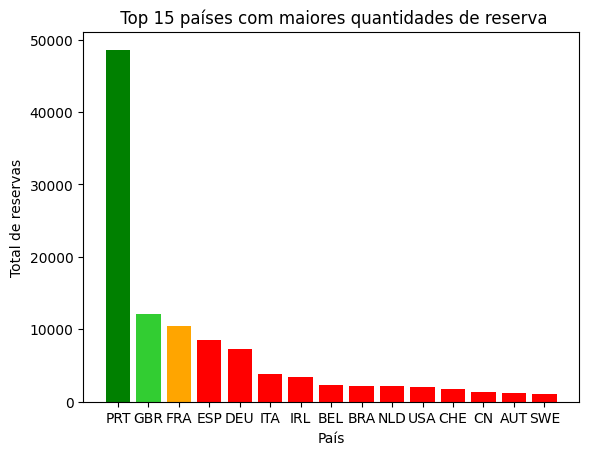

In [159]:
top_n_countries(df)

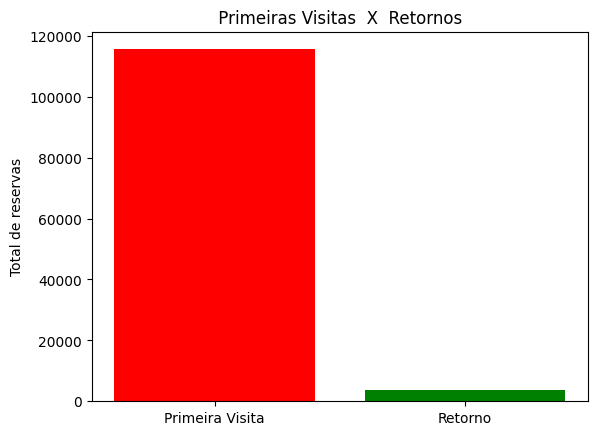

In [172]:
primeiros_x_retornos(df)

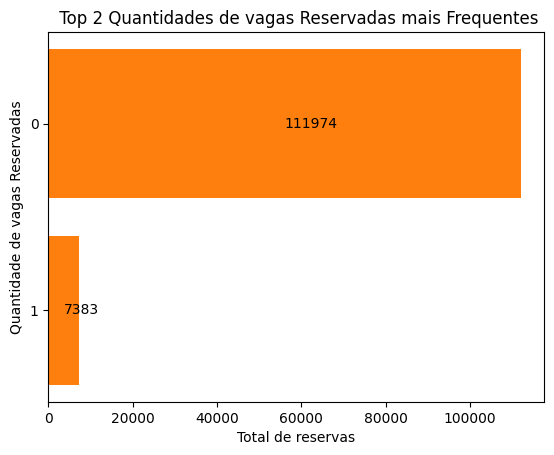

In [138]:
vagas_reservadas(df)

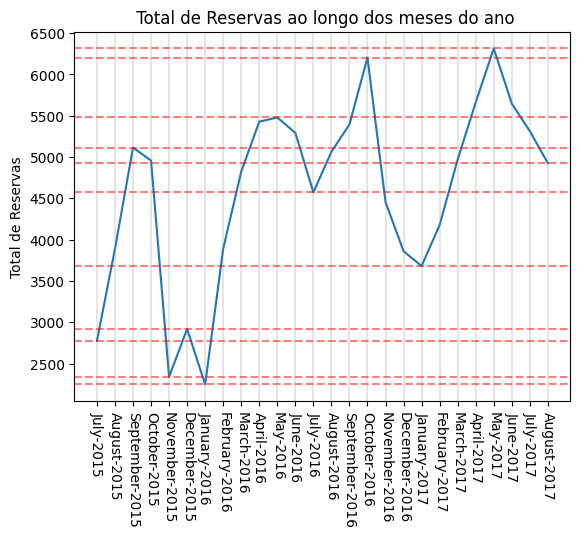

In [160]:
reservas_temportal(df)

# Comparação entre os hotéis

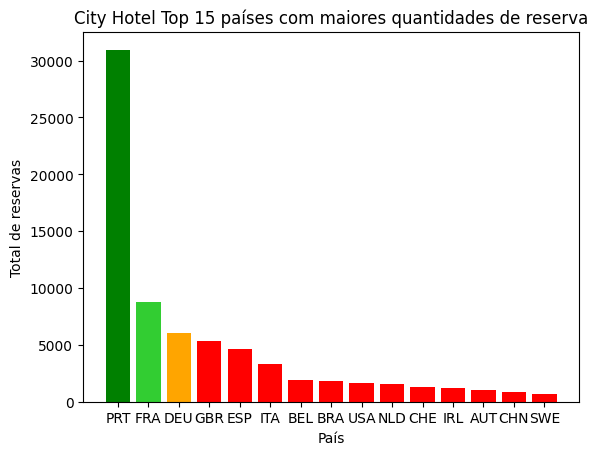

In [154]:
top_n_countries(df, 'City Hotel')

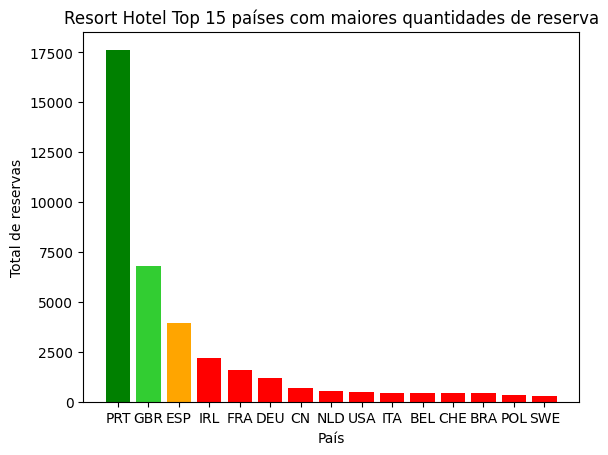

In [158]:
top_n_countries(df, 'Resort Hotel')

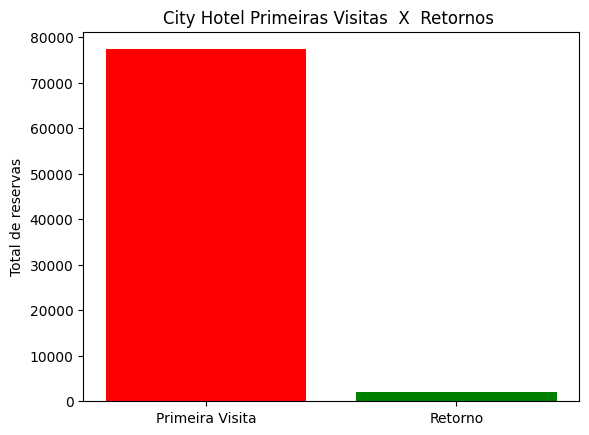

In [170]:
primeiros_x_retornos(df, 'City Hotel')

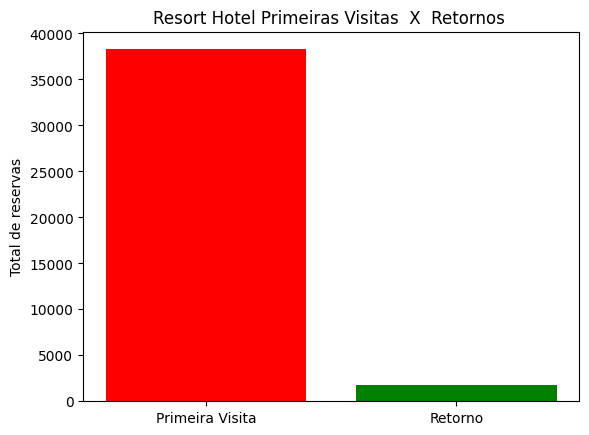

In [171]:
primeiros_x_retornos(df, 'Resort Hotel')

2


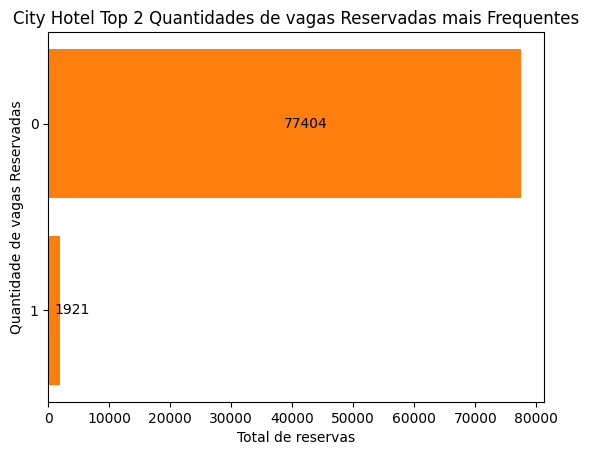

In [146]:
vagas_reservadas(df, hotel='City Hotel')

2


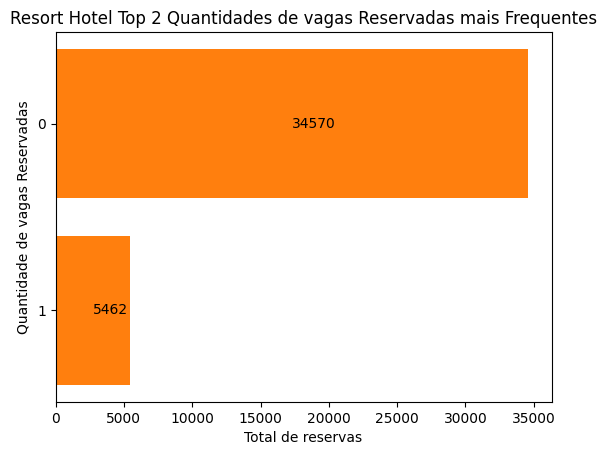

In [145]:
vagas_reservadas(df, hotel='Resort Hotel')

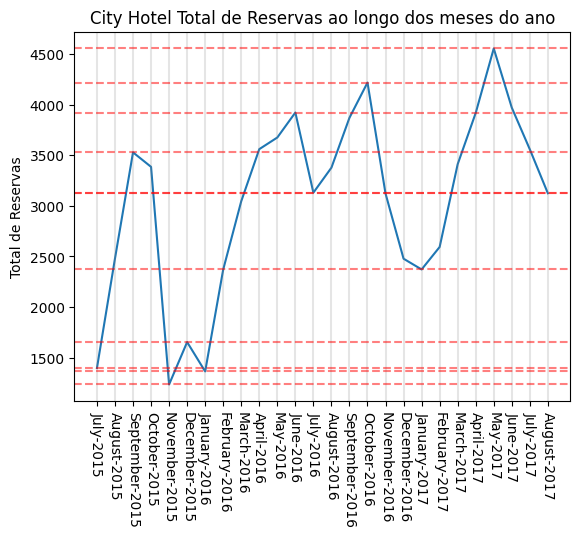

In [114]:
reservas_temportal(df, 'City Hotel')

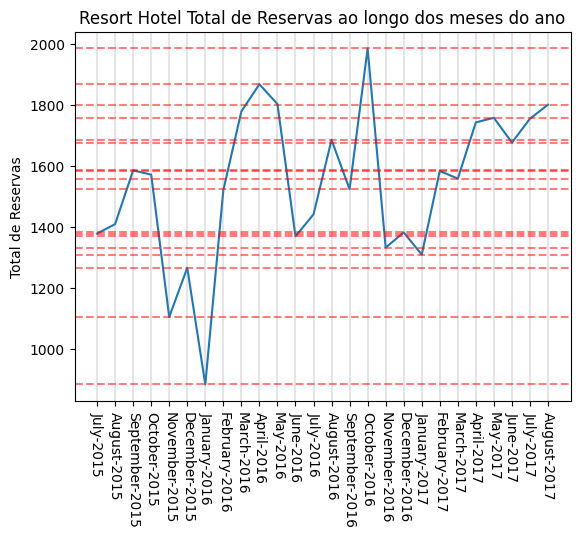

In [115]:
reservas_temportal(df, 'Resort Hotel')

In [252]:
data = get_dados_por_hotel(df)
data

,hotel,total_reservas,canceladas,total_noites_fim_de_semana,media_noites_fim_de_semana,total_noites_na_semana,media_noites_na_semana,media_adultos,media_criancas,media_bebes,media_dias_de_espera
0,Resort Hotel,40060,11122,47664,1.19,125337,3.13,1.87,0.13,0.01,0.53
1,City Hotel,79330,33102,63082,0.80,173174,2.18,1.85,0.09,0.00,3.23


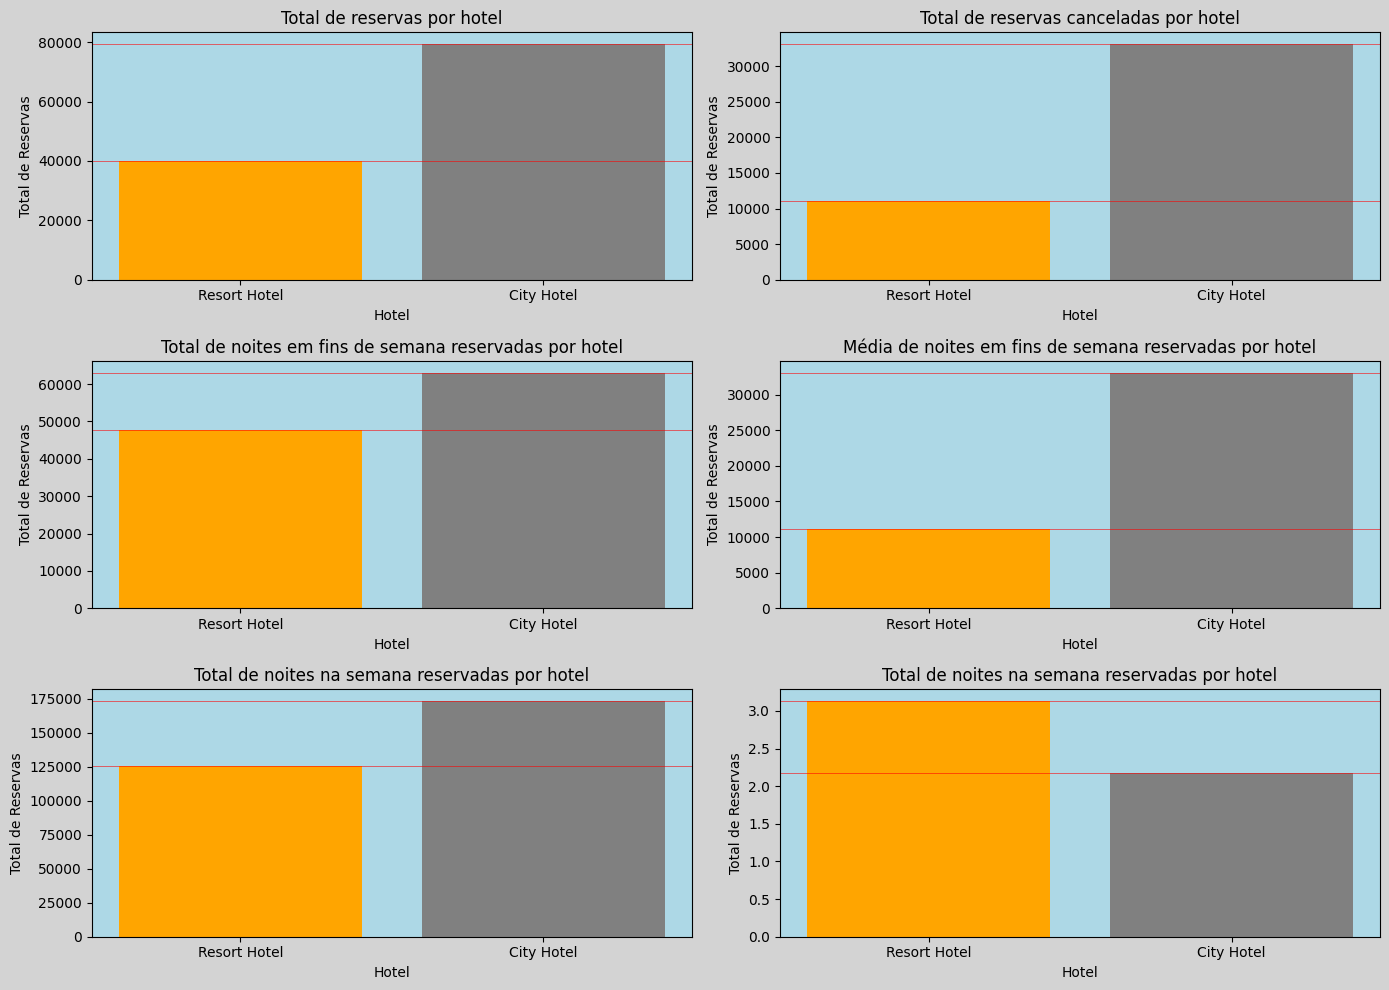

In [239]:
# Cria uma figura de tamanho()
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Define a cor de fundo da figura
fig.patch.set_facecolor('lightgray')

# Define a cor da região atrás dos gráficos
for ax in axs.flat:
    ax.set_facecolor('lightblue')

# Define o nome dos hotéis e as cores das colunas
labels = data['hotel']
colors = ['orange', 'gray']


# Plota o primeiro gráfico -----------------------------------------

height = data['total_reservas']

axs[0, 0].bar(labels, height, color=colors)
for topo in height:
    axs[0, 0].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[0, 0].set_title('Total de reservas por hotel')
axs[0, 0].set_xlabel('Hotel')
axs[0, 0].set_ylabel('Total de Reservas')

# Plota o segundo gráfico -----------------------------------------

height = data['canceladas']

axs[0, 1].bar(labels, height, color=colors)
for topo in height:
    axs[0, 1].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[0, 1].set_title('Total de reservas canceladas por hotel')
axs[0, 1].set_xlabel('Hotel')
axs[0, 1].set_ylabel('Total de Reservas')

# Plota o terceiro gráfico -----------------------------------------

height = data['total_noites_fim_de_semana']

axs[1, 0].bar(labels, height, color=colors)
for topo in height:
    axs[1, 0].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[1, 0].set_title('Total de noites em fins de semana reservadas por hotel')
axs[1, 0].set_xlabel('Hotel')
axs[1, 0].set_ylabel('Total de Reservas')

# Plota o quarto gráfico -----------------------------------------

height = data['canceladas']

axs[1, 1].bar(labels, height, color=colors)
for topo in height:
    axs[1, 1].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[1, 1].set_title('Média de noites em fins de semana reservadas por hotel')
axs[1, 1].set_xlabel('Hotel')
axs[1, 1].set_ylabel('Total de Reservas')

# Plota o quinto gráfico -----------------------------------------

height = data['total_noites_na_semana']

axs[2, 0].bar(labels, height, color=colors)
for topo in height:
    axs[2, 0].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[2, 0].set_title('Total de noites na semana reservadas por hotel')
axs[2, 0].set_xlabel('Hotel')
axs[2, 0].set_ylabel('Total de Reservas')

# Plota o sexto gráfico -----------------------------------------

height = data['media_noites_na_semana']

axs[2, 1].bar(labels, height, color=colors)
for topo in height:
    axs[2, 1].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[2, 1].set_title('Total de noites na semana reservadas por hotel')
axs[2, 1].set_xlabel('Hotel')
axs[2, 1].set_ylabel('Total de Reservas')



plt.tight_layout()
plt.show()

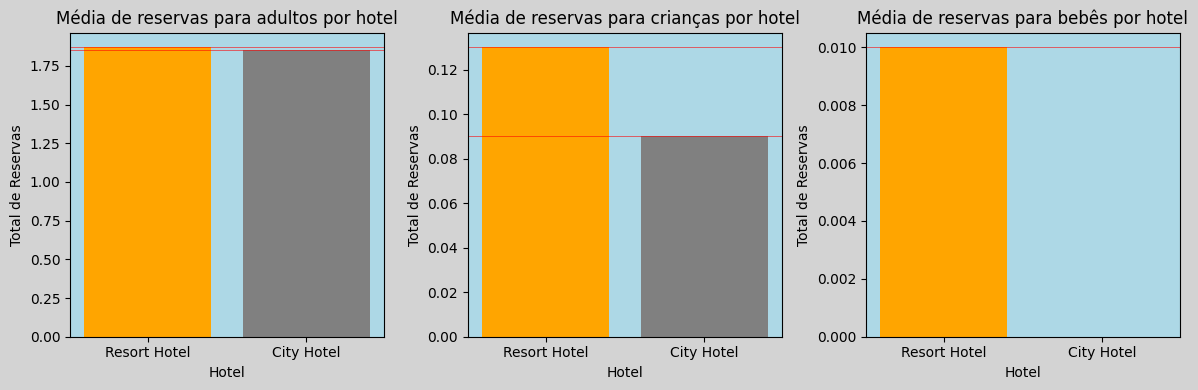

In [244]:
# Cria uma figura de tamanho()
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Define a cor de fundo da figura
fig.patch.set_facecolor('lightgray')

# Define a cor da região atrás dos gráficos
for ax in axs.flat:
    ax.set_facecolor('lightblue')

# Define o nome dos hotéis e as cores das colunas
labels = data['hotel']
colors = ['orange', 'gray']


# Plota o primeiro gráfico -----------------------------------------

height = data['media_adultos']

axs[0].bar(labels, height, color=colors)
for topo in height:
    axs[0].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[0].set_title('Média de reservas para adultos por hotel')
axs[0].set_xlabel('Hotel')
axs[0].set_ylabel('Total de Reservas')

# Plota o segundo gráfico -----------------------------------------

height = data['media_criancas']

axs[1].bar(labels, height, color=colors)
for topo in height:
    axs[1].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[1].set_title('Média de reservas para crianças por hotel')
axs[1].set_xlabel('Hotel')
axs[1].set_ylabel('Total de Reservas')

# Plota o terceiro gráfico -----------------------------------------

height = data['media_bebes']

axs[2].bar(labels, height, color=colors)
for topo in height:
    axs[2].axhline(topo, color='red', linestyle='-', linewidth=0.4)
axs[2].set_title('Média de reservas para bebês por hotel')
axs[2].set_xlabel('Hotel')
axs[2].set_ylabel('Total de Reservas')


plt.tight_layout()
plt.show()

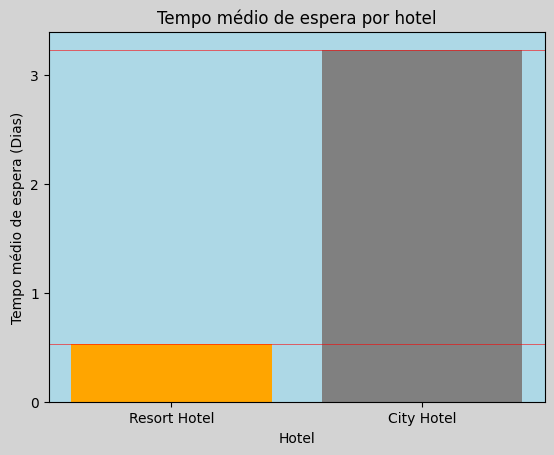

In [250]:
labels = data['hotel']
height = data['media_dias_de_espera']
colors = ['orange', 'gray']

# Define a cor de fundo
plt.figure(facecolor='lightgray')
# Define a cor da região atrás dos gráficos
plt.gca().set_facecolor('lightblue')
plt.bar(labels, height, color=colors)

for topo in height:
    plt.axhline(topo, color='red', linestyle='-', linewidth=0.4)

plt.yticks(range(int(max(height))+1))

plt.title('Tempo médio de espera por hotel')
plt.xlabel('Hotel')
plt.ylabel('Tempo médio de espera (Dias)')

plt.show()